# Tiago testcases 

## Simulation of typical section aeroelastic response (based on setup at ITA LNCA)

In [2]:
#workspace()
include("../src/UNSflow.jl")
using UNSflow


Use "(eld::EldUpDef)(...)" instead.

Use "(eld::EldUptstartDef)(...)" instead.

Use "(cons::ConstDef)(...)" instead.

Use "(eld::EldRampReturnDef)(...)" instead.

Use "(kin::SinDef)(...)" instead.

Use "(kin::CosDef)(...)" instead.
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:294
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:486
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:606
  likely near /Users/kiran/Documents/Projects/UNSflow/src/types.jl:674

Use "(eld::EldUpIntDef)(...)" instead.

Use "(eld::EldUpInttstartDef)(...)" instead.

Use "(kelv::KelvinCondition)(...)" instead.

Use "(kelv::KelvinCondition2DOF)(...)" instead.

Use "(kelv::KelvinCondition2DFree)(...)" instead.

Use "(kelv::KelvinConditionwFlap)(...)" instead.

Use "(kelv::KelvinKutta)(...)" instead.

Use "(kelv::Kelvin

### Structural and aerodynamic parameters

In [18]:
c = 0.29; #m, Chord
mass = 6.5 # + 7.0; %kg, Mass from base and typical seccion
airdensity = 1.119 #kg/m^3   ### Structural definitions
pvt = 0.43105  #Elastic Axis, Percentage from LE Pivot(0-1)

w_h = 2.38*2*pi  # rad/s Natural Frequency for H
w_alpha = 4.29*2*pi  #rad/s Natural Frequency for Alpha

x_alpha = 0.0275/(c/2) #Distance between ea and cg divided by c %Static Unbalance
r_alpha = 0.064/(c/2) # 2*sqrt(Itheta/(m*c^2)) %Radius of Gyration (Admensional)
kappa = pi*airdensity*c^2/(4*mass/0.75) 

w_alphadot = 0.
w_hdot = 1.
cubic_h_1 = 1.
cubic_h_3 = 0.
cubic_alpha_1 = 1.
cubic_alpha_3 = 0.

0.0

### Initial condition

In [19]:
alpha_init = 10*pi/180
alphadot_init = 0.
h_init = 0.
hdot_init = 0.
udot = 0


0

### Simulation control

In [20]:
dt = 0.015
lespcrit = [0.1;] # High value, No LEV shedding
del = DelVortDef(1, 500, 10)



UNSflow.DelVortDef(1,500,10.0)

### Case 1

In [21]:
u = 16

kinem = KinemPar2DOF(alpha_init, h_init, alphadot_init, hdot_init, u, udot, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)

strpar = TwoDOFPar(x_alpha, r_alpha, kappa, w_alpha, w_h, w_alphadot, w_hdot, cubic_h_1, cubic_h_3, cubic_alpha_1, cubic_alpha_3)

surf = TwoDSurf_2DOF(c, u, "FlatPlate", pvt, 70, 35, strpar, kinem, lespcrit)

curfield = TwoDFlowField()

nsteps = 100

@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del)


  0.718924 seconds (137.30 k allocations: 21.474 MB, 0.45% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 0.0269156 0.150035 … 0.0264097 0.146039; 0.0271875 0.149575 … 0.0261886 0.144864],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(0.1495745915618544,0.0009799746844438991,-1.7081589802945647,0.05

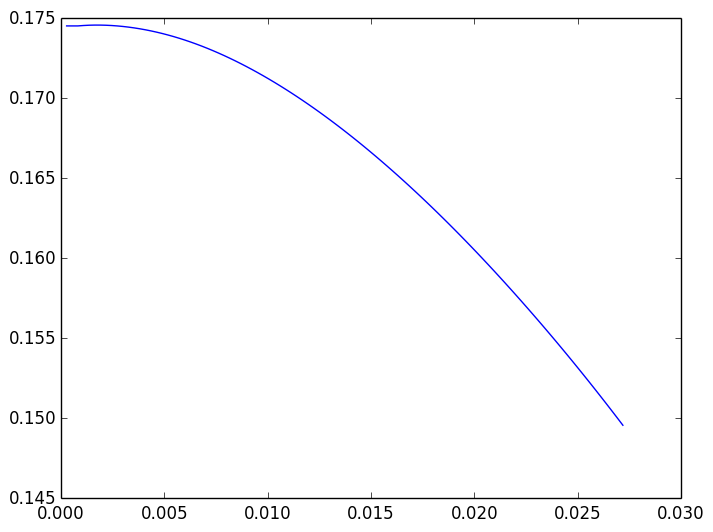

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319cc9110>

In [22]:
plot(mat[:,1],mat[:,2])

In [23]:
t = mat[end,1]  

nsteps = 1000
@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del, t, mat, ke)



 36.967323 seconds (1.46 M allocations: 432.027 MB, 0.14% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 0.298791 0.224944 … 0.163483 0.289264; 0.299062 0.225944 … 0.173169 0.284679],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(0.22594413315625642,-0.017674221785431033,3.674563553535143,0.1662286

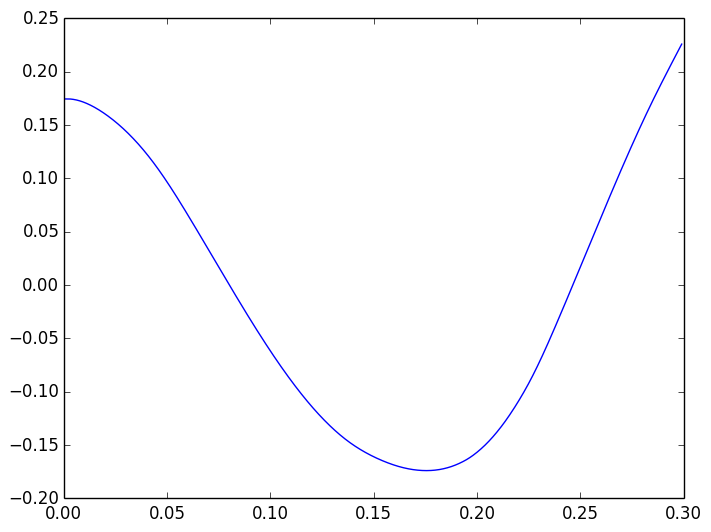

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a386290>

In [24]:
plot(mat[:,1],mat[:,2])

In [25]:
t = mat[end,1]  

nsteps = 3000
@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del, t, mat, ke)



402.930160 seconds (6.34 M allocations: 3.215 GB, 0.12% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 1.11442 -1.12211 … 4.56677 -0.192637; 1.11469 -1.1346 … 4.62549 -0.171928],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(-1.134603455713804,-0.04885770992412258,-45.70571210416648,-0.7275870920

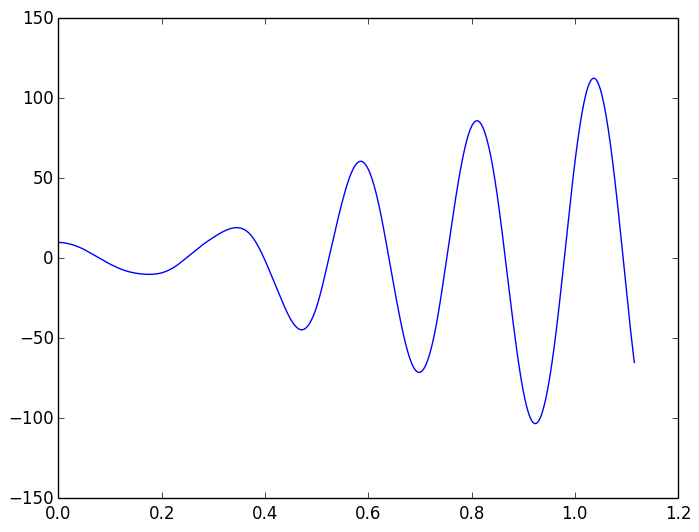

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319442850>

In [27]:
plot(mat[:,1],mat[:,2]*180/pi)


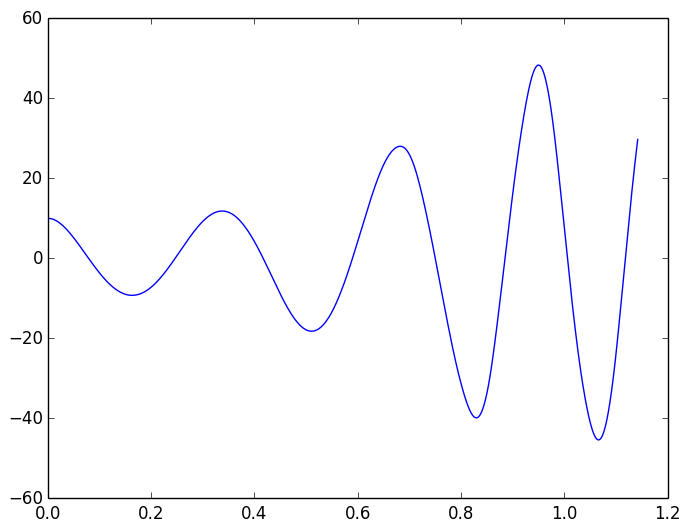

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1091c4dd0>

In [12]:
plot(mat[:,1],mat[:,2]*180/pi)

In [13]:
t = mat[end,1]  

nsteps = 3000
@time mat, surf, curfield, ke = ldvm(surf, curfield, nsteps, dt, del, t, mat, ke)



359.802771 seconds (6.06 M allocations: 3.551 GB, 0.12% gc time)


(
[0.000271875 0.174533 … 3.32173 -0.575909; 0.00054375 0.174533 … 0.0585594 0.0731989; … ; 1.95723 -1.72205 … 1.27558 0.410627; 1.9575 -1.71949 … 1.28317 0.410029],

UNSflow.TwoDSurf_2DOF(0.29,16.0,"FlatPlate",0.43105,70,35,[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0455303,0.0910607,0.136591,0.182121,0.227652,0.273182,0.318712,0.364243,0.409773  …  2.73182,2.77735,2.82288,2.86841,2.91394,2.95947,3.005,3.05053,3.09606,3.14159],[0.0,0.000150267,0.000600758,0.00135054,0.00239805,0.00374113,0.00537699,0.00730224,0.00951289,0.0120044  …  0.277996,0.280487,0.282698,0.284623,0.286259,0.287602,0.288649,0.289399,0.28985,0.29],UNSflow.TwoDOFPar(0.18965517241379312,0.44137931034482764,0.008528327517829698,26.954864967800425,14.953981031087414,0.0,1.0,1.0,0.0,1.0,0.0),UNSflow.KinemPar2DOF(-1.7194931033628305,-0.03672002288507633,9.798638124613086,0.3060579102711

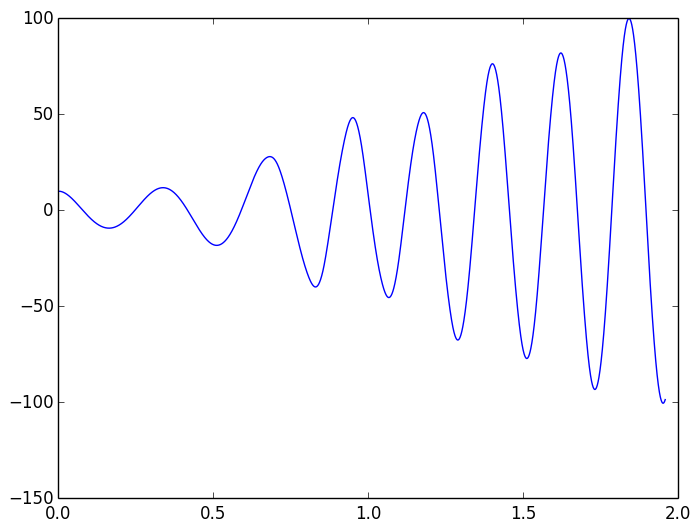

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x319c71490>

In [17]:
plot(mat[:,1],mat[:,2]*180/pi)